### ปฏิบัติการครั้งที่ 9 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นตั้งค่า share ให้เหมาะสม
2. ส่ง link ใน Mango

ดาวน์โหลดข้อมูลการขายรถยนต์ใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CarSales.csv  

In [1]:
!wget -O CarSales.csv https://donlapark.pages.dev/229351/data/CarSales.csv

--2024-02-15 04:09:15--  https://donlapark.pages.dev/229351/data/CarSales.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1834 (1.8K) [text/csv]
Saving to: ‘CarSales.csv’

CarSales.csv        100%[===================>]   1.79K  --.-KB/s    in 0s      

2024-02-15 04:09:16 (31.3 MB/s) - ‘CarSales.csv’ saved [1834/1834]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return pd.datetime.strptime(dates, '%Y-%m')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CarSales.csv', parse_dates=['Month'],
                                        index_col='Month',
                                        date_parser=parser)

print (data.head())

            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587


<ipython-input-3-8498dab4b797>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(dates, '%Y-%m')


In [4]:
y = data['Sales'].astype('float32')

print(y)

Month
1960-01-01     6550.0
1960-02-01     8728.0
1960-03-01    12026.0
1960-04-01    14395.0
1960-05-01    14587.0
               ...   
1968-08-01    16722.0
1968-09-01    14385.0
1968-10-01    21342.0
1968-11-01    17180.0
1968-12-01    14577.0
Name: Sales, Length: 108, dtype: float32


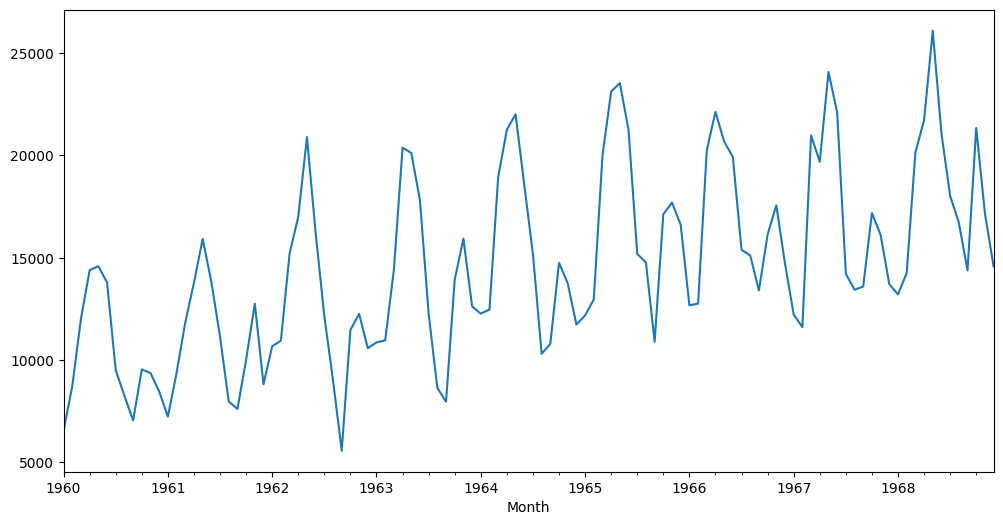

In [5]:
plt.figure(figsize=(12,6))
y.plot();

In [6]:
def rmse(y_true,y_pred): # ยิ่งน้อย model/ค่าทำนาย ยิ่งดี
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

# Train-Test split

In [7]:
train = y[:-12] # ตั้งแต่แถวแรกถึง 12 เดือนจากแถวสุดท้าย
test = y[-12:] # ตั้งแต่ 12 เดือนสุดท้าย

print(test)

Month
1968-01-01    13210.0
1968-02-01    14251.0
1968-03-01    20139.0
1968-04-01    21725.0
1968-05-01    26099.0
1968-06-01    21084.0
1968-07-01    18024.0
1968-08-01    16722.0
1968-09-01    14385.0
1968-10-01    21342.0
1968-11-01    17180.0
1968-12-01    14577.0
Name: Sales, dtype: float32


## Test stationarity

### KPSS
- $H_0$: data is stationary # เราอยากได้สมมติฐานหลักนี้
- $H_1$: data is **not** stationary # สมมติฐานแย้งนี้เราไม่อยากได้


### ADF (Dickey-Fuller) # เกี่ยวข้องกับ unit root
- $H_0$: data is **not** stationary
- $H_1$: data is stationary


In [8]:
from statsmodels.tsa.stattools import adfuller, kpss

def KPSStest(timeseries):
  kpsstest = kpss(timeseries)
  print('KPSS test')
  print('Test Statistic: ',kpsstest[0])
  print('p-value: ',kpsstest[1])
  print('Number of Observations Used: ',kpsstest[2])
  print('Critical Values: ',kpsstest[3])

def ADFtest(timeseries):
  adftest = adfuller(timeseries)
  print('ADF test')
  print('Test Statistic: ',adftest[0])
  print('p-value: ',adftest[1])
  print('#Lags Used: ',adftest[2])
  print('Number of Observations Used: ',adftest[3])
  print('Critical Values: ',adftest[4])

In [9]:
KPSStest(y) # if p-value < 0.05 -> Accept H1 (Reject H0) => not stationary
ADFtest(y) # p-value = 0.6632691049832861 -> Accept H0 => not stationary --> ตรงกันดังนั้น Difference 1 รอบ!

KPSS test
Test Statistic:  1.2500741949219631
p-value:  0.01
Number of Observations Used:  5
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -1.2238127661752858
p-value:  0.6632691049832861
#Lags Used:  12
Number of Observations Used:  95
Critical Values:  {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}


<ipython-input-8-69c709c00ffc>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries)


In [10]:
y_diff = y-y.shift()
y_diff.dropna(inplace=True)

KPSStest(y_diff) # p-value = 0.1 > 0.05 ดังนั้น Accept H0
ADFtest(y_diff) # p-value = 5.844e-08 < 0.05 ดังนั้น Accept H1 เป็น stationary แล้ว

KPSS test
Test Statistic:  0.02243288590583808
p-value:  0.1
Number of Observations Used:  1
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -6.1997992308006955
p-value:  5.8447525992768446e-08
#Lags Used:  11
Number of Observations Used:  95
Critical Values:  {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}


<ipython-input-8-69c709c00ffc>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries)


# ARIMA($p,d,q$)

ลองพล็อต ACF และ PACF ของ time series **ที่ผ่าน difference แล้ว**

1. ถ้า ACF ลดลงไปเรื่อยๆ และ PACF หายไปหลังจาก lag ใด lag หนึ่ง แสดงว่าค่าของ lag นั้นเป็นค่าอันดับ AR (นั่นคือค่า $p$) ที่เหมาะสม
2. ถ้า PACF ลดลงไปเรื่อยๆ และ ACF หายไปหลังจาก lag ใด lag หนึ่ง แสดงว่าค่าของ lag นั้นเป็นค่าอันดับ MA (นั่นคือค่า $q$) ที่เหมาะสม

Threshold = $\pm 1.96/\sqrt{N}$

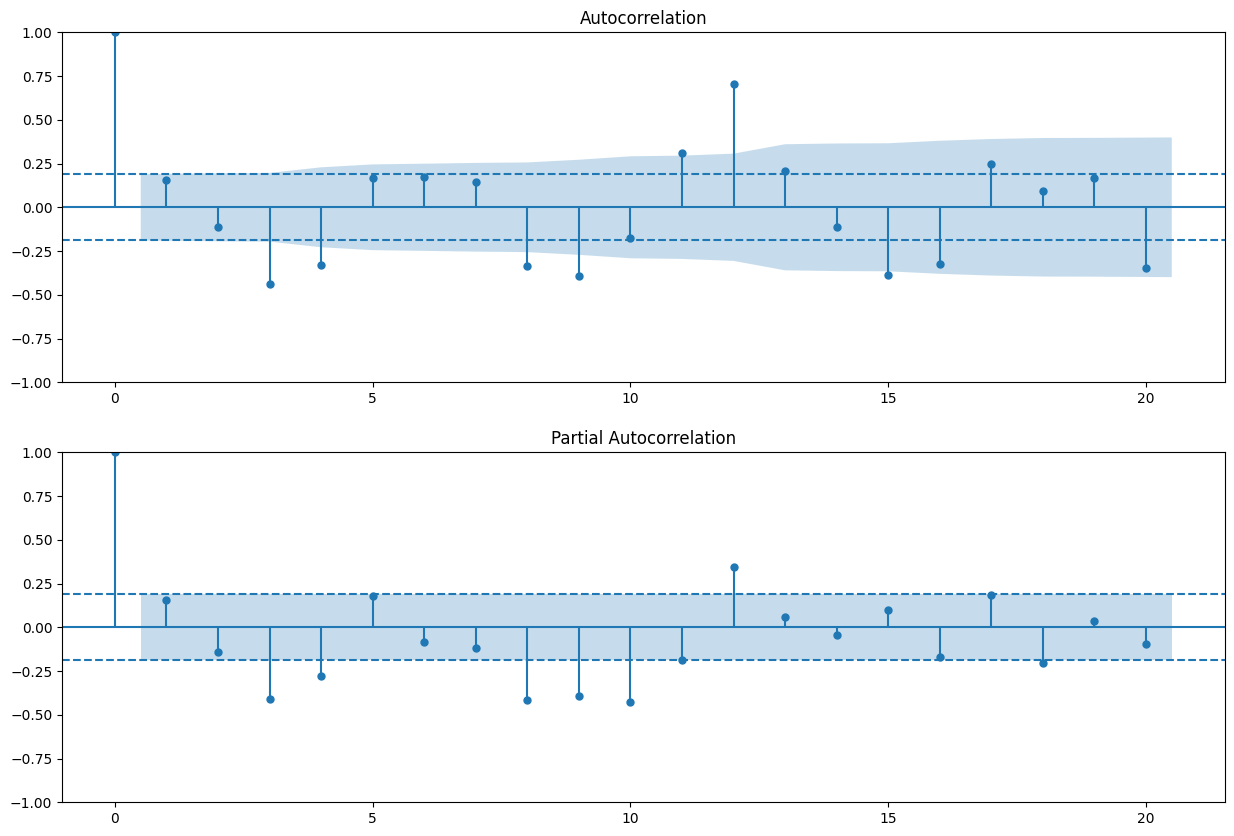

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1,figsize=(15, 10))

plot_acf(y_diff, lags=20, ax=ax[0]);
ax[0].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[0].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

plot_pacf(y_diff, lags=20, ax=ax[1]);
ax[1].axhline(y=-1.96/(len(y)-1)**.5, linestyle = '--')
ax[1].axhline(y=1.96/(len(y)-1)**.5, linestyle = '--')

#### Note
Possible models: ARIMA(4,1,0) or ARIMA(0,1,4)

In [12]:
train

Month
1960-01-01     6550.0
1960-02-01     8728.0
1960-03-01    12026.0
1960-04-01    14395.0
1960-05-01    14587.0
               ...   
1967-08-01    13434.0
1967-09-01    13598.0
1967-10-01    17187.0
1967-11-01    16119.0
1967-12-01    13713.0
Name: Sales, Length: 96, dtype: float32

In [13]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(train, order=(4,1,0))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
arima_fit = arima.fit()
yhat = arima_fit.predict('1968-01-01', '1968-12-01') # Output ที่ได้จะเป็นค่าที่ทำนายออกมา

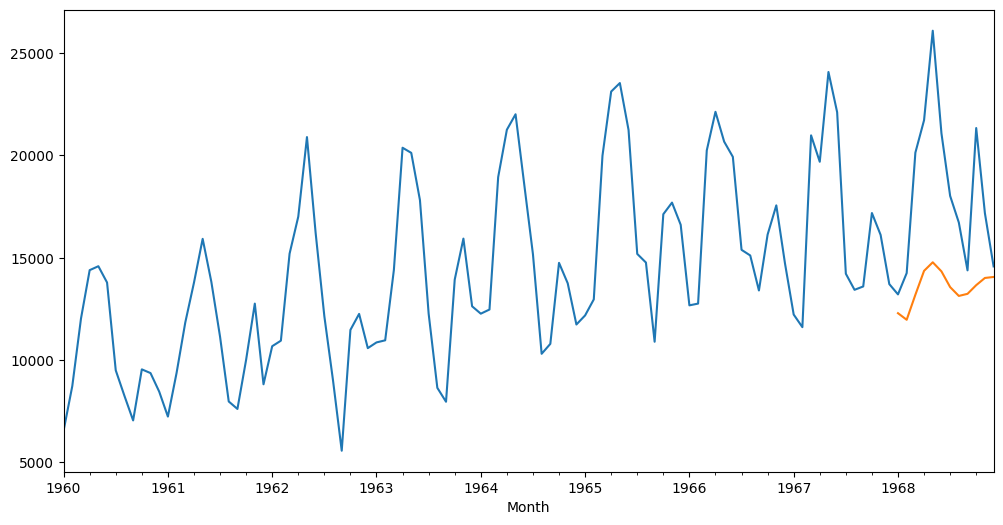

In [15]:
plt.figure(figsize=(12,6)) # นำค่าที่ทำนาย (yhat) มา plot กับ time series ที่เรามีตั้งแต่แรก (y)
y.plot()
yhat.plot();

พบว่ายังไม่ค่อยดี ยังจับ Seasonality ไม่ค่อยได้

เราจึงต้องใช้ SARIMA หรือ SARIMAX (SARIMA + X) ลักษณะการใช้เหมือน ARIMA โดยสามารถใช้กับข้อมูลที่ไม่มีตัวแปรต้นก็ได้

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: optimized. After release 0.14, this will raise.
  warnings.warn(


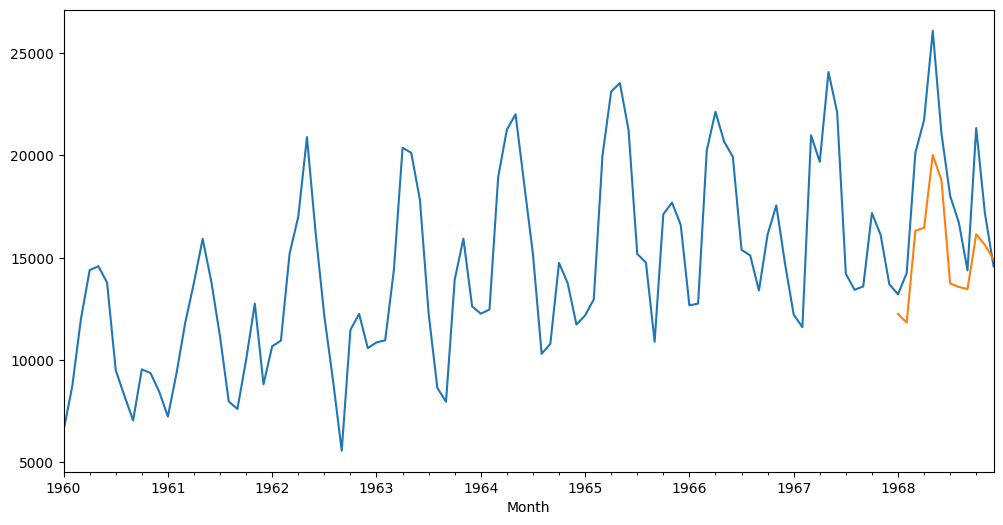

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train, order=(4, 1, 0), seasonal_order=(0, 0, 1, 12)) # 12 คือ Season หนึ่งมีทั้งหมดกี่หน่วยเวลา ในที่นี่คือ 1 ปีมี 12 เดือน

sarima_fit = sarima.fit(optimized=True)
yhat = sarima_fit.predict('1968-01-01', '1968-12-01')

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

ค่าที่ทำนายได้ก็จะดีกว่าเดิม มีการขึ้นๆลงๆ เป็น pattern เหมือนกับช่วงเวลาที่ผ่านมา

ดังนั้นถ้าข้อมูลเรามี Seasonality เราควรที่จะใช้ SARIMA

In [17]:
print('RMSE:',rmse(test,yhat))

RMSE: 3532.861693536078


### ใช้ `auto_arima` จาก `pmdarima` เพื่อหา order ที่เหมาะสม

In [18]:
!pip3 install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00


In [20]:
import pmdarima as pm
# 2 บรรทัดแรกจะเป็น input parameter ที่สำคัญ
auto_fit = pm.auto_arima(train, start_p=0, start_q=0, max_p=3, max_q=3, d=1,
                             seasonal=True, m=12, start_P=0, start_Q=0, D=1,
                             information_criterion = 'aicc', # choose model with the lowest corrected AIC
                             trace = True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True) # don't want convergence warnings

Performing stepwise search to minimize aicc
 ARIMA(0,1,0)(0,1,0)[12]             : AICC=1509.873, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AICC=1477.491, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AICC=1470.648, Time=0.56 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AICC=1483.837, Time=0.17 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AICC=1470.200, Time=0.70 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AICC=1468.048, Time=0.49 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AICC=1470.180, Time=0.93 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AICC=inf, Time=1.79 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AICC=1493.330, Time=0.11 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AICC=1468.012, Time=0.50 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AICC=1486.065, Time=0.07 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AICC=1469.837, Time=0.74 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AICC=1470.021, Time=0.48 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AICC=1470.155, Time=0.53 sec
 ARIMA(1,

In [21]:
auto_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -729.786
Date:                             Thu, 15 Feb 2024   AIC                           1467.572
Time:                                     04:39:19   BIC                           1477.248
Sample:                                 01-01-1960   HQIC                          1471.459
                                      - 12-01-1967                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2169      0.140      1.545      0.122      -0.058       0.492
ma.L1         -0.8626      0.084    -10.242      0.000      -1.028      -0.698
ar.S.L12      -0.4418      0.103     -4.295      0.000      -0.643      -0.240
sigma2      2.401e+06   3.91e+05      6.133      0.000    1.63e+06    3.17e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 1.11
Prob(Q):                              0.56   Prob(JB):                         0.57
Heteroskedasticity (H):               1.09   Skew:                             0.28
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

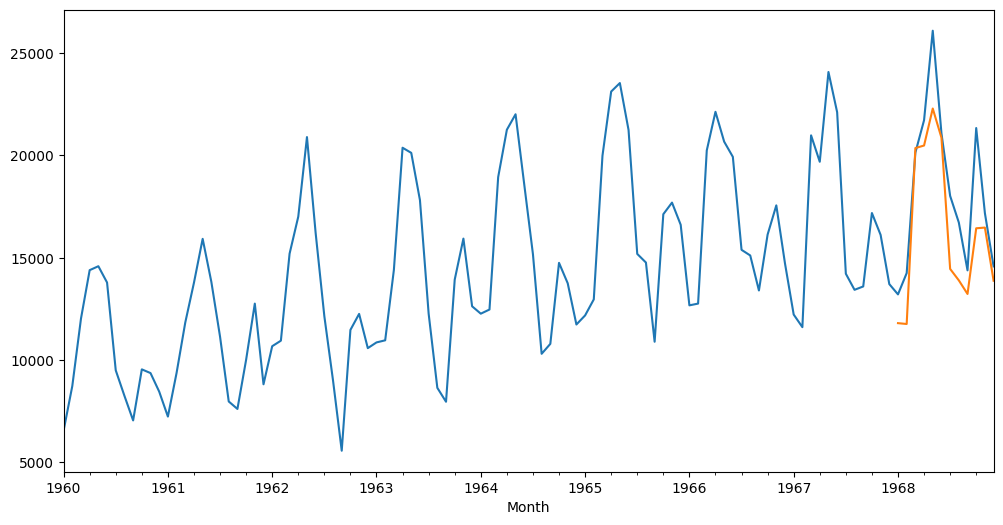

In [22]:
predictions = auto_fit.predict(12)
yhat = pd.Series(predictions,
                    index=test.index) # ที่สำคัญคือตรงนี้ index ตรงนี้ต้องเท่ากับ index ใน test set

plt.figure(figsize=(12,6))
ax = y.plot()
yhat.plot(ax=ax);

ค่าที่ทำนายของ model ตัวนี้น่าจะดีที่สุด เพราะดูใกล้เคียงมากเลย

In [23]:
print('RMSE:',rmse(test,yhat))

RMSE: 2437.8137045885355


ดูจาก RMSE ของ test set แล้วน้อยกว่า model ก่อนหน้า ดังนั้น model นี้ทำนายได้แม่นยำกว่า